# Adding Mechanics to cytosim (advanced)
Requires Python>=3.7  
Before running, copy or move the cytosim module (cytosim.---.so) to the current folder.
```bash
$ make -j4 pycytosim
$ cp bin/*.so examples/
```

Here we showcase the addition of mechanical constraints.

In [1]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_sim(sim):
    space = sim.spaces[0]
    plt.figure()
    r = np.linspace(0,2.0*np.pi,100)
    plt.plot(5.0* np.cos(r),5.0*np.sin(r),color="black")
    for fiber in sim.fibers:
        p = fiber.points()
        plt.plot(p[:,0],p[:,1])
        plt.scatter(p[:,0],p[:,1])
    
    plt.axis('equal')
    plt.show()
    

## Fiber simulation
Here we simulate two fibers.

In [3]:
sim = cytosim.start("../cym/fiber.cym")

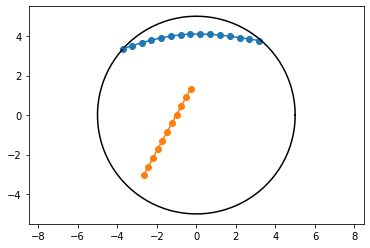

In [4]:
# Adding with instructions
sim.fibers[0].cutM(5.0)
sim.add("filament","length = 5",)
sim.run(10)
plot_sim(sim)

## Adding Forces 
First we identify the (interpolated) center points of fibers, then we add different forces to them.

In [5]:
meca = sim.sMeca
pt1 = sim.fibers[0].interpolateCenter()
pt2 = sim.fibers[1].interpolateCenter()

### Adding a point force
We add a point foce to the fiber center

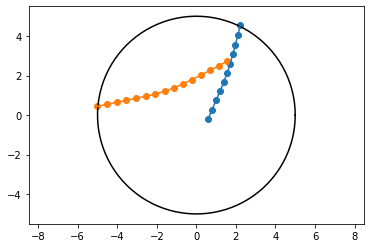

In [6]:
for t in range(20):
    sim.step()
    sim.prepare_meca()
    meca.addForce(pt1,[-5.0,-5])
    meca.addForce(pt2,[5.0,+5])
    sim.prepared_solve()
    
plot_sim(sim)

### Adding a link
A link adds an elastic force between points

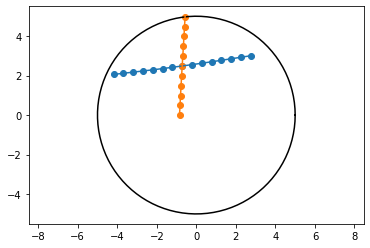

In [7]:
for t in range(20):
    sim.step()
    sim.prepare_meca()
    meca.addLink(pt1,pt2,1000.0)
    sim.prepared_solve()
    
plot_sim(sim)

###  Adding a torque to fiber 1

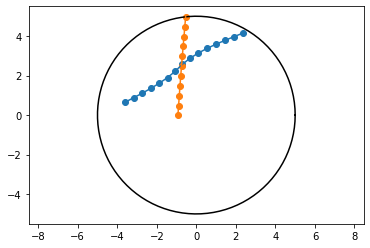

In [8]:
for t in range(10):
    sim.step()
    sim.prepare_meca()
    meca.addTorque(pt1,[10.0])
    sim.prepared_solve()
    
plot_sim(sim)

### Adding a torque to make fibers parrallel

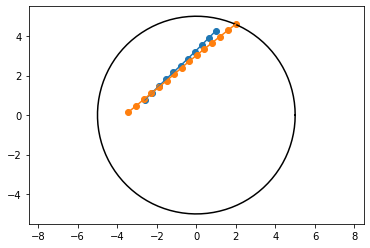

In [9]:
for t in range(20):
    sim.step()
    sim.prepare_meca()
    meca.addTorqueParrallel(pt1,pt2,20.0)
    sim.prepared_solve()
    
plot_sim(sim)